<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Data & Basic Analysis

In [2]:
Employee_Data = pd.read_csv('HR_comma_sep.csv')
Employee_Data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Find the shape

Employee_Data.shape


(14999, 10)

In [4]:
# Display the top 5 rows.

#Employee_Data.head()
Employee_Data.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns

Employee_Data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics

Employee_Data.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Find the null values

Employee_Data.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [8]:
# sum of null values

Employee_Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [9]:
# count of null values

Employee_Data.isnull().sum().sum()

0

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

In [10]:
# Count of how many employees left the company

Employee_Data['left'].sum()

3571

**Task 5:** Make a plot of your findings (only turn-over employees)

In [11]:


# Calculate the turnover rate for employees

turnover = Employee_Data['left'].sum() * 100 / len(Employee_Data)
turnover

23.80825388359224

<Axes: xlabel='left', ylabel='count'>

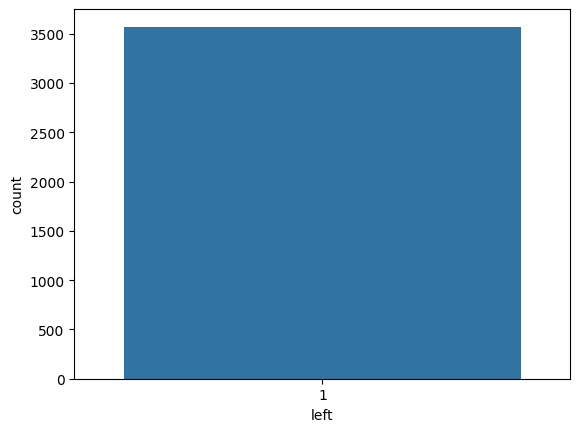

In [12]:
turn_over = Employee_Data[Employee_Data['left'] == 1]
sns.countplot(data=turn_over, x='left')


In [13]:
# Filter the dataset to include only employees who left
# turn_over = Employee_Data[Employee_Data['left'] == 1]

# # Plotting the turnover employees
# plt.line(["Turnover Employees"], [turn_over.shape[0]])



<Axes: xlabel='left'>

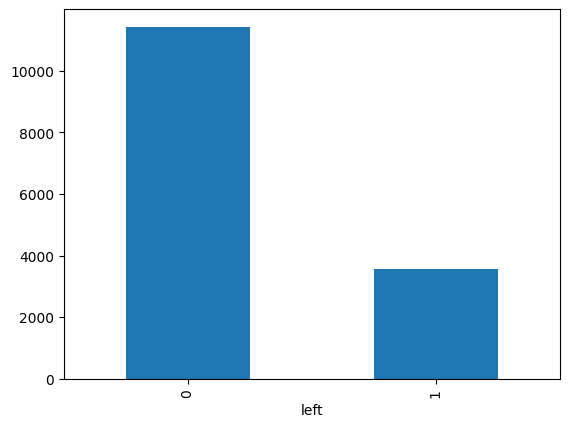

In [14]:
Employee_Data.left.value_counts().plot(kind='bar')

<Axes: xlabel='left', ylabel='count'>

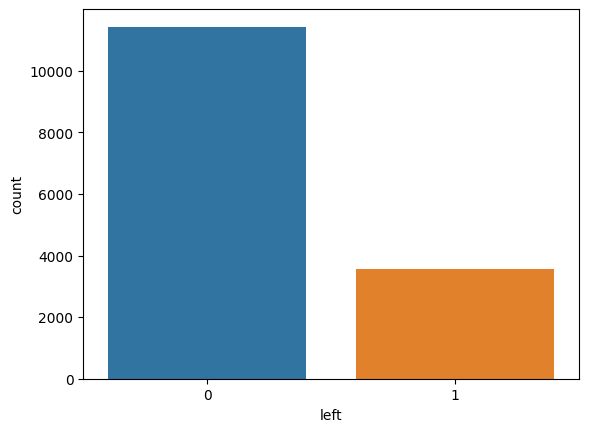

In [15]:
sns.countplot(data = Employee_Data, x='left')

Answer: 

## **Time spent at the company**

<Axes: xlabel='time_spend_company'>

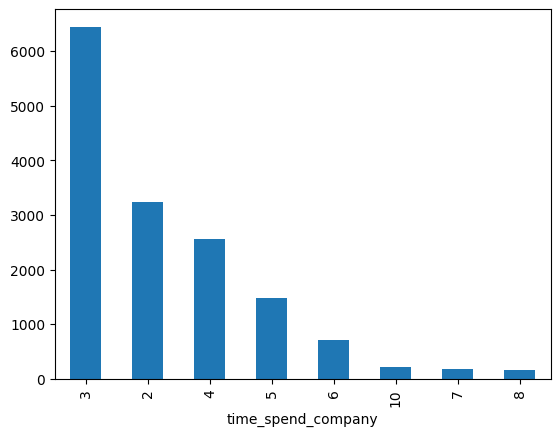

In [16]:
# Show the plot for the count of years here

Employee_Data.time_spend_company.value_counts().plot(kind='bar')

<Axes: xlabel='time_spend_company', ylabel='count'>

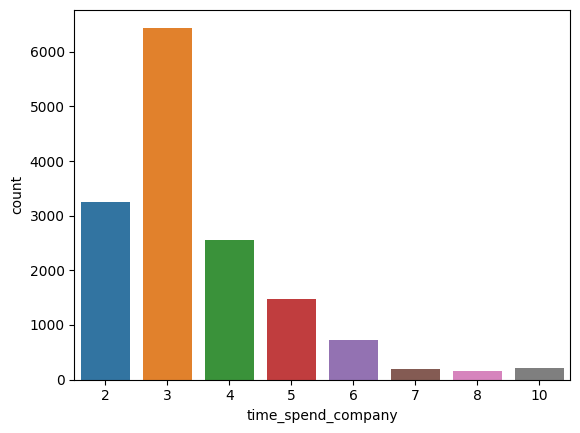

In [17]:
sns.countplot(data = Employee_Data, x='time_spend_company')

In [18]:
# Write the code here to get the percentage of employees leaving.

left_perc =Employee_Data['left'].sum()/len(Employee_Data)*100
left_perc


23.80825388359224

<Axes: xlabel='time_spend_company', ylabel='left'>

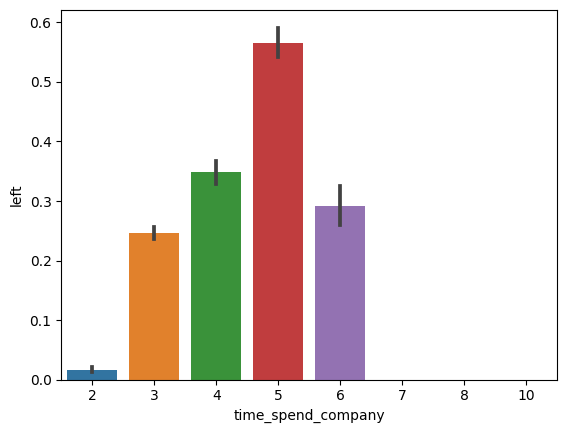

In [19]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave

sns.barplot(Employee_Data, x = 'time_spend_company', y = 'left')

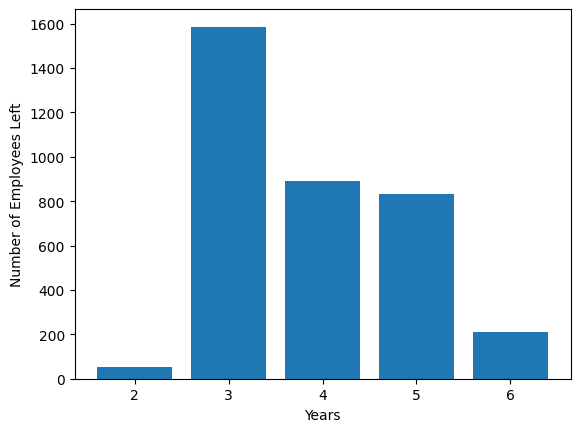

In [20]:


years_counts = turn_over['time_spend_company'].value_counts()


# Plotting the bar plot
plt.bar(years_counts.index, years_counts.values)
plt.xlabel('Years')
plt.ylabel('Number of Employees Left')
plt.show()


**Question: After what time period are employees most likely to leave the company ?**

**Ans:**  After 3 Years

In [21]:
# Find the year(s) after which employees are most likely to leave the company

most_likely_to_leave = years_counts.idxmax()
most_likely_to_leave


3

## **Employees engaged in any work accident**

In [22]:
# Number of employees involved in work accident

Employee_Data['Work_accident'].sum()

2169

Answer: 

In [23]:
# Number of employees involved in work accident and left or not left

emp_acc = Employee_Data[Employee_Data['Work_accident'] == 1]

count_left = emp_acc['left'].sum()
count_no_left = len(emp_acc) - count_left

print('Number of employees involved in work accident and left are: ', count_left)
print('Number of employees involved in work accident and not left are: ', count_no_left)



Number of employees involved in work accident and left are:  169
Number of employees involved in work accident and not left are:  2000


## **Promotions in last 5 years**

In [24]:
# Write code here
Employee_Data['promotion_last_5years'].sum()

319

## **Salary trends**

<Axes: xlabel='salary', ylabel='count'>

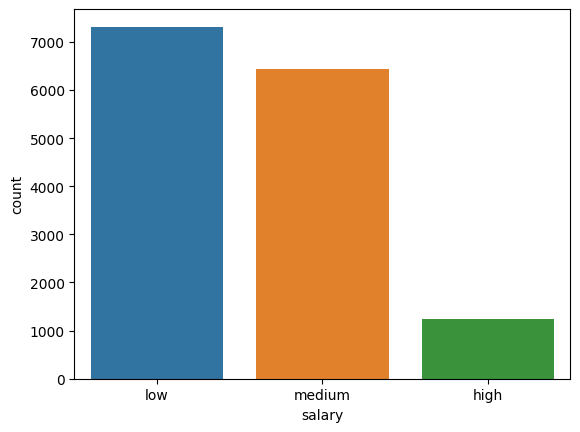

In [25]:
# Write code here

sns.countplot(Employee_Data, x='salary')

Answer: 

## **Employees per Department**

In [29]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.

department_counts = Employee_Data['dept'].value_counts()
department_counts


dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

<Axes: xlabel='dept', ylabel='count'>

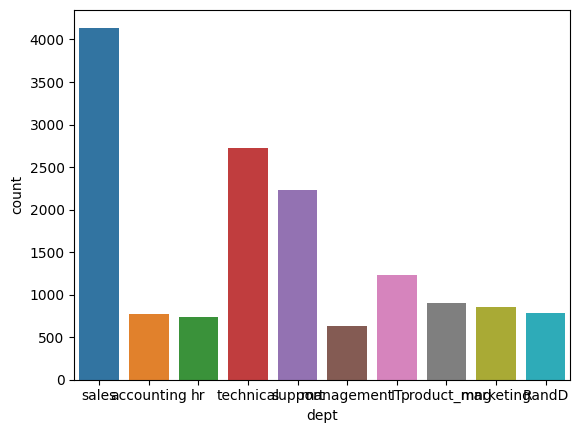

In [27]:
sns.countplot(Employee_Data, x= 'dept')

## **Satisfaction Level**